In [1]:
import pandas as pd
import matplotlib 

/tmp/ipykernel_2635617/4095250448.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Create dataframe from CSV file

> DATAFRAME : DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.<br>
> read_csv method: read csv file given and return df obj

In [110]:
df = pd.read_csv('music.csv')
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


## Dataframe from dictionary
> DataFrame method: returns df object


In [111]:
df2 = pd.DataFrame({
    'name': ['John', 'Paul', 'George', 'Ringo'],
    'age': [22, 23, 24, 25],
    'Gender': ['M', 'M', 'M','M']
})
df2

,name,age,Gender
0,John,22,M
1,Paul,23,M
2,George,24,M
3,Ringo,25,M


## Get data type of each column in data frame

In [112]:
print(df['age'].dtype)
print(df['gender'].dtype)
print(df['genre'].dtype)

int64
int64
object


## single column from a DataFrame.

In [113]:
print(df['age'])
print(df2['name'])

0     20
1     23
2     25
3     26
4     29
5     30
6     31
7     33
8     37
9     20
10    21
11    25
12    26
13    27
14    30
15    31
16    34
17    35
Name: age, dtype: int64
0      John
1      Paul
2    George
3     Ringo
Name: name, dtype: object


## multiple columns

In [114]:
print(df[['age','gender']])
print(df2[['age','name']])

    age  gender
0    20       1
1    23       1
2    25       1
3    26       1
4    29       1
5    30       1
6    31       1
7    33       1
8    37       1
9    20       0
10   21       0
11   25       0
12   26       0
13   27       0
14   30       0
15   31       0
16   34       0
17   35       0
   age    name
0   22    John
1   23    Paul
2   24  George
3   25   Ringo


## rows based on a condition (e.g., age > 30).

In [115]:
print(df[df['age']>30])

    age  gender      genre
6    31       1  Classical
7    33       1  Classical
8    37       1  Classical
15   31       0  Classical
16   34       0  Classical
17   35       0  Classical


## subset of rows and columns using both row and column labels.
> .iloc() : Purely integer-location based indexing for selection by position.

In [116]:
print(df[2:4])

df.iloc[2:4,0]

   age  gender   genre
2   25       1  HipHop
3   26       1    Jazz


2    25
3    26
Name: age, dtype: int64

## Check for missing values in a DataFrame and handle them appropriately.

In [117]:
df['gender'].fillna('no gender') # find all NaN and replace with 'no gender'

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: gender, dtype: int64

## Drop duplicate rows from a DataFrame.

> drop_duplicates() : By default, it removes duplicate rows based on all columns.

In [118]:
df.drop_duplicates() #Return DataFrame with duplicate rows removed.

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


> To remove duplicates on specific column(s), use "subset"

In [119]:
df.drop_duplicates(subset="gender")

,age,gender,genre
0,20,1,HipHop
9,20,0,Dance


> To remove duplicates and keep last occurrences, use "keep"

In [120]:
df.drop_duplicates(subset='gender',keep='last')

,age,gender,genre
8,37,1,Classical
17,35,0,Classical


## Convert data types of columns in a DataFrame
> to_numeric: convert arg to numeric type, default float64 or int64

In [121]:
df['gender'] = pd.to_numeric(df['gender'])
print(df['gender'].dtype)

int64


## Add a new column to a DataFrame based on existing columns.
> insert() method: location of col, name of col, value of col, allow duplicate 

In [122]:
df2.insert(3,'height',[5,5,5,5],True)


## Rename columns in a DataFrame.

In [123]:
df2.rename(columns={'height':"songs"},inplace=True)

## Delete columns in a DataFrame.

In [124]:
df2.drop(['songs'],axis=1)

,name,age,Gender
0,John,22,M
1,Paul,23,M
2,George,24,M
3,Ringo,25,M


In [125]:
df2

,name,age,Gender,songs
0,John,22,M,5
1,Paul,23,M,5
2,George,24,M,5
3,Ringo,25,M,5


## sort values of cols

In [126]:
df2.sort_values(['age'],ascending=False)

,name,age,Gender,songs
3,Ringo,25,M,5
2,George,24,M,5
1,Paul,23,M,5
0,John,22,M,5


## Group a DataFrame by a categorical variable and compute summary statistics (e.g., mean, median) for each group.

> groupby() : A groupby operation involves some combination of splitting the object, applying a function, and combining the results.<br>
> agg() : Aggregate using one or more operations over the specified axis.

In [127]:
df.groupby('genre').agg({'age':'mean','gender':'mean'})

,age,gender
genre,,
Acoustic,27.666667,0.0
Classical,33.500000,0.5
Dance,22.000000,0.0
HipHop,22.666667,1.0
Jazz,28.333333,1.0


## Custom aggregation function

In [128]:
get_mean = lambda a : a.mean()
df.groupby('genre').agg({'age':get_mean})

,age
genre,
Acoustic,27.666667
Classical,33.500000
Dance,22.000000
HipHop,22.666667
Jazz,28.333333


## Histogram plot

<Axes: title={'center': 'my plot'}, ylabel='Frequency'>

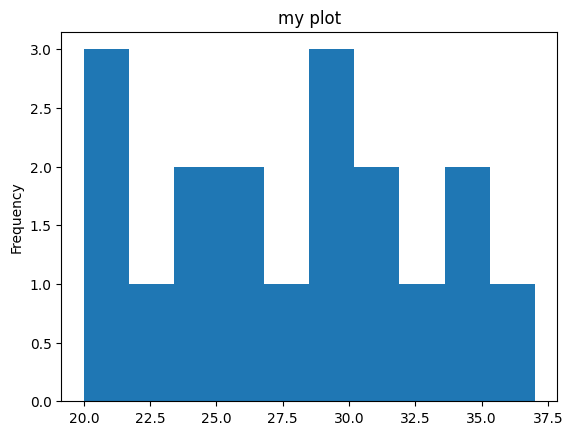

In [129]:
df['age'].plot(kind='hist', title='my plot')

## Scatter graph on two numerical cols

<Axes: xlabel='age', ylabel='gender'>

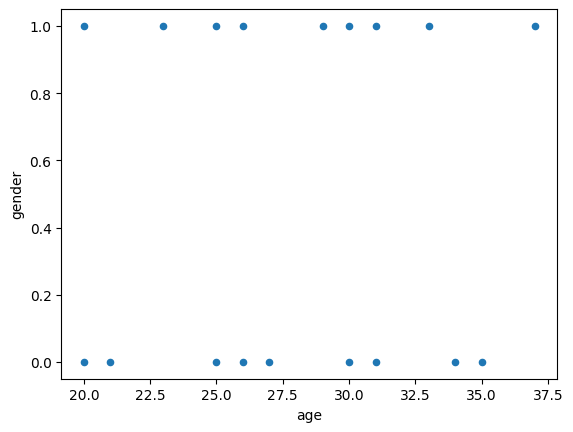

In [130]:
df.plot.scatter(x='age',y='gender')

<Axes: >

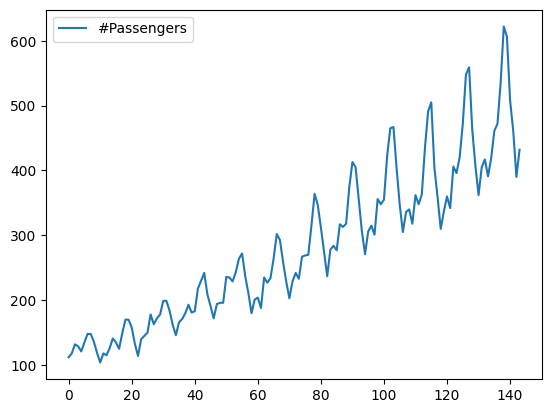

In [131]:
df_time = pd.read_csv('AirPassengers.csv')
df_time.plot.line()

## Merging two dataframes
> dataframe.merge(second_df, how={'inner' | 'outer' | "left" | "right" | "cross"}, on=col_name) <br>
<br>
> by default: 
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)[source]


In [132]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar1', 'baz', 'foo'],
                    'value': [5, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 2, 7, 8]})

df1.merge(df2,left_on='lkey',right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,5,foo,5
1,foo,5,foo,8
2,baz,3,baz,7
3,foo,5,foo,5
4,foo,5,foo,8


## Join two DataFrames based on their indices.

>>> DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False, validate=None)
>>>> Join columns with other DataFrame either on index or on a key column. Efficiently join multiple DataFrame objects by index at once by passing a list.

In [133]:
df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})

other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                       'B': ['B0', 'B1', 'B2']})

df.join(other,how='inner' ,lsuffix='_caller',rsuffix='_other')

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2


## If we want to join using the key columns, we need to set key to be the index in both df and other. The joined DataFrame will have key as its index.


In [134]:
df.set_index('key').join(other.set_index('key'))

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,NaN
K4,A4,NaN
K5,A5,NaN


## Concatenate multiple DataFrames along rows and columns.
>> pandas.concat(objs, *, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=None)


In [135]:
d4 = pd.DataFrame([['a',1],['b',2]],columns=['letters','number'])
d5 = pd.DataFrame([['c',3],['d',4]],columns=['letter','number'])

print(pd.concat([d4,d5]))
print(pd.concat([d4,d5], axis=1))
print(pd.concat([d4,d5],ignore_index=True))

  letters  number letter
0       a       1    NaN
1       b       2    NaN
0     NaN       3      c
1     NaN       4      d
  letters  number letter  number
0       a       1      c       3
1       b       2      d       4
  letters  number letter
0       a       1    NaN
1       b       2    NaN
2     NaN       3      c
3     NaN       4      d


# Reshaping and Pivoting
> ## Pivot a DataFrame to convert unique values in one column into multiple columns.
>> pandas.pivot(data, *, columns, index=_NoDefault.no_default, values=_NoDefault.no_default)
>>> Reshape data (produce a “pivot” table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame.

In [136]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

print(df)
print()
print(df.pivot(index=['foo'], columns=['bar']))
print(df.pivot(index=['foo'], columns=['bar'], values=['baz']))

   foo bar  baz zoo
0  one   A    1   x
1  one   B    2   y
2  one   C    3   z
3  two   A    4   q
4  two   B    5   w
5  two   C    6   t

    baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t
    baz      
bar   A  B  C
foo          
one   1  2  3
two   4  5  6


## Melt a DataFrame to convert multiple columns into a single column with key-value pairs.

In [137]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
print(df)

pd.melt(df)

   A  B  C
0  a  1  2
1  b  3  4
2  c  5  6


,variable,value
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


## Stack and unstack levels of a multi-index DataFrame.

In [138]:
multicol2 = pd.MultiIndex.from_tuples([('weight', 'kg'),
                                       ('height', 'm')])
df_multi_level_cols2 = pd.DataFrame([[1.0, 2.0], [3.0, 4.0]],
                                    index=['cat', 'dog'],
                                    columns=multicol2)
print(df_multi_level_cols2)

print(df_multi_level_cols2.stack())

    weight height
        kg      m
cat    1.0    2.0
dog    3.0    4.0
        weight  height
cat kg     1.0     NaN
    m      NaN     2.0
dog kg     3.0     NaN
    m      NaN     4.0


/tmp/ipykernel_2417171/1370064367.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  print(df_multi_level_cols2.stack())


## Resample time-series data to a different frequency

In [19]:
df_time2 = pd.read_csv('DailyDelhiClimateTrain.csv')
df_time2['date'] = pd.to_datetime(df_time2['date']) # changing data type of column date
df_time2['months'] = pd.DatetimeIndex(df_time2['date']).month # adding new col 'months' and taking index from date col on basis of month
df_time2.groupby('months').mean().get(['humidity']) # grouping on basis of months col and get mean of all and then getting only humidity col

,humidity
months,
1,78.603500
2,67.959397
3,60.698463
4,39.036537
5,35.739941
6,50.628724
7,70.631436
8,70.469849
9,60.724564


In [36]:
df_time2.rolling('2D', on='date').mean()
df_time2.rolling('2D', on='date').median()
df_time2.rolling('2D', on='date').sum()

,date,humidity,meanpressure,meantemp,months,wind_speed
0,2013-01-01,84.500000,1015.666667,10.000000,1.0,0.000000
1,2013-01-02,176.500000,2033.466667,17.400000,2.0,2.980000
2,2013-01-03,179.000000,2036.466667,14.566667,2.0,7.613333
3,2013-01-04,158.333333,2035.833333,15.833333,2.0,5.866667
4,2013-01-05,158.166667,2033.666667,14.666667,2.0,4.933333
...,...,...,...,...,...,...
1457,2016-12-28,135.593478,2032.765217,34.067391,24.0,11.882826
1458,2016-12-29,155.900621,2032.469979,32.455487,24.0,9.547826
1459,2016-12-30,177.523810,2034.809524,29.333333,24.0,12.266667
1460,2016-12-31,176.666667,2034.004762,29.147870,24.0,13.591667


In [41]:
df_time2.set_index('date')['2013-01-01':'2013-01-05']

,meantemp,humidity,wind_speed,meanpressure,months
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1
